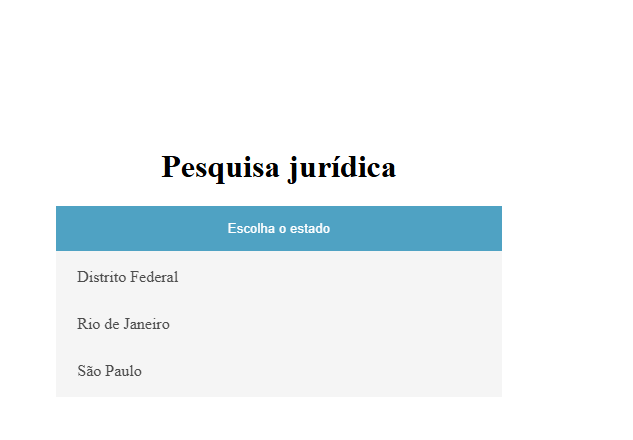

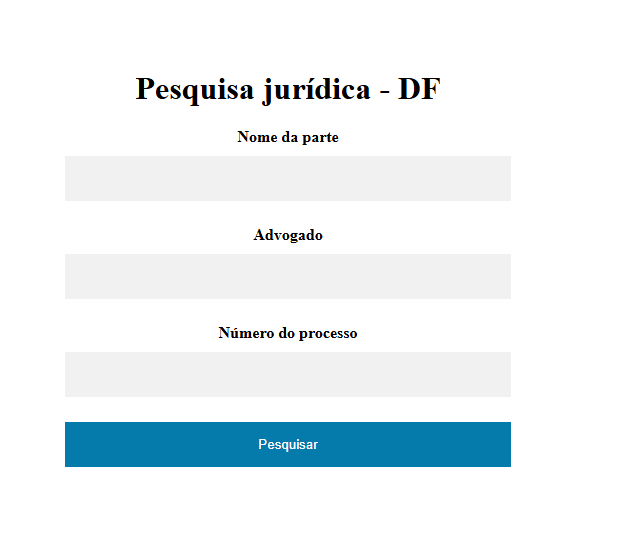

In [ ]:
# criar o navegador
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)

# OBSERVAÇÃO: A geração do popup é aleatória, podendo ser que possui ou não (apenas para exemplo)



====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\joaol\.wdm\drivers\chromedriver\win32\99.0.4844.51]


In [ ]:
# abrir a página index (entrar no site da busca jurídica)
import os

caminho = os.getcwd()
arquivo = caminho + r"\index.html"


In [43]:
# importar a base de dados
import pandas as pd

tabela = pd.read_excel("Processos.xlsx")
display(tabela)

,Nome,Advogado,Processo,Cidade,Status
0,Lira,Alon Lawyer,PC6592,Distrito Federal,NaN
1,João,Lawyer Alon,EB3792,Rio de Janeiro,NaN
2,Amanda,Amanda mesmo,MM1043,Rio de Janeiro,NaN
3,Carol,Amanda,PC5197,São Paulo,NaN


In [ ]:
from selenium.webdriver import ActionChains
import time

for linha in tabela.index:

    # para cada processo (linha da tabela)
    navegador.get(arquivo)

    # abrir a lista de cidades
    botao = navegador.find_element(By.CLASS_NAME, 'dropdown-menu')
    ActionChains(navegador).move_to_element(botao).perform()
    
    cidade = tabela.loc[linha, "Cidade"]
    
    # selecionando o cidade - PARTIAL_LINK_TEXT usado para encontrar partes do texto em um link
    navegador.find_element(By.PARTIAL_LINK_TEXT, cidade).click()
    
    # mudar para a nova aba
    aba_original = navegador.window_handles[0]
    indice = 1 + linha
    nova_aba = navegador.window_handles[indice]
    
    navegador.switch_to.window(nova_aba)
    
    # preencher o formulário com os dados de busca
    navegador.find_element(By.ID, 'nome').send_keys(tabela.loc[linha, "Nome"])
    navegador.find_element(By.ID, 'advogado').send_keys(tabela.loc[linha, "Advogado"])
    navegador.find_element(By.ID, 'numero').send_keys(tabela.loc[linha, "Processo"])

    # clicar em pesquisar
    navegador.find_element(By.CLASS_NAME, 'registerbtn').click()
    
    # confirmar a pesquisa
    alerta = navegador.switch_to.alert
    alerta.accept()
    
    # esperar o resultado da pesquisa e agir de acordo com o resultado
    while True:
        try:
            alerta = navegador.switch_to.alert
            break
        except:
            time.sleep(1)
    texto_alerta = alerta.text

    if "Processo encontrado com sucesso" in texto_alerta:
        alerta.accept()
        tabela.loc[linha, "Status"] = "Encontrado"
    else:
        tabela.loc[linha, "Status"] = "Não encontrado"
        alerta.accept()

In [45]:
navegador.quit()
display(tabela)

tabela.to_excel("Processos Atualizado.xlsx")

,Nome,Advogado,Processo,Cidade,Status
0,Lira,Alon Lawyer,PC6592,Distrito Federal,Encontrado
1,João,Lawyer Alon,EB3792,Rio de Janeiro,Não encontrado
2,Amanda,Amanda mesmo,MM1043,Rio de Janeiro,Encontrado
3,Carol,Amanda,PC5197,São Paulo,Não encontrado
